# Homework 1
## Section 3: Perscription Data

(

In [12]:
#Import the basic packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
from datetime import timedelta  
import csv
import numpy as np
import time
from pandas.io.json import json_normalize #package for flattening json in pandas df
import seaborn as sns

In [2]:
rxdata = pd.read_json(r"C:\Users\zgeorge\Dropbox (CMN Hospitals)\George\School\Fall 2018\Applied Machine Learning\practice_python\Homework 1\roam_prescription_based_prediction.jsonl",lines=True)
rxdata.head(5)

,cms_prescription_counts,npi,provider_variables
0,"{'DOXAZOSIN MESYLATE': 26, 'MIDODRINE HCL': 12...",1295763035,"{'settlement_type': 'non-urban', 'generic_rx_c..."
1,"{'CEPHALEXIN': 23, 'AMOXICILLIN': 52, 'HYDROCO...",1992715205,"{'settlement_type': 'non-urban', 'generic_rx_c..."
2,"{'CEPHALEXIN': 28, 'AMOXICILLIN': 73, 'CLINDAM...",1578587630,"{'settlement_type': 'non-urban', 'generic_rx_c..."
3,{'AMOXICILLIN': 63},1932278405,"{'settlement_type': 'non-urban', 'generic_rx_c..."
4,"{'PIOGLITAZONE HCL': 24, 'BENAZEPRIL HCL': 29,...",1437366804,"{'settlement_type': 'non-urban', 'generic_rx_c..."


In [3]:
provider_data = json_normalize(data=rxdata['provider_variables'])
prvd_df = pd.DataFrame(provider_data)
prvd_df.head(5)

,brand_name_rx_count,gender,generic_rx_count,region,settlement_type,specialty,years_practicing
0,384,M,2287,South,non-urban,Nephrology,7
1,0,M,103,South,non-urban,General Practice,7
2,0,M,112,Midwest,non-urban,General Practice,7
3,0,M,63,South,non-urban,General Practice,7
4,316,M,1035,West,non-urban,Nephrology,6


In [4]:
prvd_df.describe()

,brand_name_rx_count,generic_rx_count,years_practicing
count,239930.000000,239930.000000,239930.000000
mean,176.264144,795.547047,6.241875
std,475.159281,1809.618284,1.649269
min,0.000000,0.000000,1.000000
25%,0.000000,36.000000,6.000000
50%,15.000000,145.000000,7.000000
75%,154.000000,750.000000,7.000000
max,30547.000000,101079.000000,8.000000


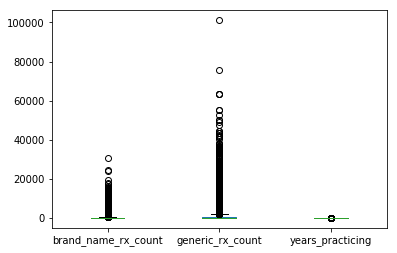

In [5]:
bncountbox = prvd_df.plot(kind="box")

In [6]:
q_df = prvd_df.quantile([.25, .75])
q_df.loc['iqr'] = q_df.loc[0.75] - q_df.loc[0.25]
q_df.loc['whisker_length'] = 1.5 * q_df.loc['iqr']
q_df.loc['max_whisker'] = q_df.loc['whisker_length'] + q_df.loc[0.75]
q_df.loc['min_whisker'] = q_df.loc[0.25] - q_df.loc['whisker_length']
q_df

,brand_name_rx_count,generic_rx_count,years_practicing
0.25,0.0,36.0,6.0
0.75,154.0,750.0,7.0
iqr,154.0,714.0,1.0
whisker_length,231.0,1071.0,1.5
max_whisker,385.0,1821.0,8.5
min_whisker,-231.0,-1035.0,4.5


In [7]:
max_outlier_bnrxcount = [brandnames for brandnames in prvd_df['brand_name_rx_count'] if brandnames > q_df['brand_name_rx_count'].loc['max_whisker']]
print("brand_name_rx_count Outliers")
print(len(max_outlier_bnrxcount))

max_outlier_genrxcount = [generics for generics in prvd_df['generic_rx_count'] if generics > q_df['generic_rx_count'].loc['max_whisker']]
print("generic_rx_count Outliers")
print(len(max_outlier_genrxcount))

brand_name_rx_count Outliers
31412
generic_rx_count Outliers
30496


In [8]:
#prvd_df['gender'] = prvd_df['gender'].astype('category')

prvd_df['region'] = prvd_df['region'].astype('category')

prvd_df['settlement_type'] = prvd_df['settlement_type'].astype('category')

prvd_df['specialty'] = prvd_df['specialty'].astype('category')
prvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239930 entries, 0 to 239929
Data columns (total 7 columns):
brand_name_rx_count    239930 non-null int64
gender                 239930 non-null object
generic_rx_count       239930 non-null int64
region                 239930 non-null category
settlement_type        239930 non-null category
specialty              239930 non-null category
years_practicing       239930 non-null int64
dtypes: category(3), int64(3), object(1)
memory usage: 8.2+ MB


In [9]:
prvd_df['bn_to_gen'] = prvd_df['brand_name_rx_count'] / prvd_df['generic_rx_count']
prvd_df['total_rx_count'] = prvd_df['brand_name_rx_count'] + prvd_df['generic_rx_count']
prvd_df.head(5)

,brand_name_rx_count,gender,generic_rx_count,region,settlement_type,specialty,years_practicing,bn_to_gen,total_rx_count
0,384,M,2287,South,non-urban,Nephrology,7,0.167906,2671
1,0,M,103,South,non-urban,General Practice,7,0.000000,103
2,0,M,112,Midwest,non-urban,General Practice,7,0.000000,112
3,0,M,63,South,non-urban,General Practice,7,0.000000,63
4,316,M,1035,West,non-urban,Nephrology,6,0.305314,1351


In [10]:
prvd_df.corr()

,brand_name_rx_count,generic_rx_count,years_practicing,bn_to_gen,total_rx_count
brand_name_rx_count,1.000000,0.790673,0.129440,0.176963,0.864548
generic_rx_count,0.790673,1.000000,0.121950,-0.000851,0.991255
years_practicing,0.129440,0.121950,1.000000,0.056737,0.128000
bn_to_gen,0.176963,-0.000851,0.056737,1.000000,0.037445
total_rx_count,0.864548,0.991255,0.128000,0.037445,1.000000


C:\Users\zgeorge\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


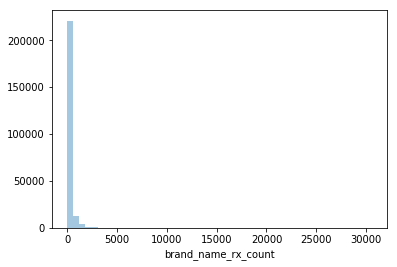

In [17]:
sns.distplot(prvd_df.brand_name_rx_count, kde=False)